In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
data = '/content/FIFAdata.csv'
fifa = pd.read_csv(data, encoding="cp1252")

In [ ]:
fifa.head()

In [ ]:
fifa.columns

In [ ]:
fifa1 = pd.DataFrame({'Name': fifa.Name,'Club':fifa.Club,'Position':fifa.Position,}) #선수정보데이터
fifa2 = fifa.iloc[:,54:88].astype(float) #스텟데이터

td = pd.concat([fifa1,fifa2],axis=1)
td

In [ ]:
td.Position.value_counts()

In [ ]:
td.loc[td['Position']=='LF', ['Position']] = 'ST'
td.loc[td['Position']=='RF', ['Position']] = 'ST'
td.loc[td['Position']=='CF', ['Position']] = 'ST'
td.loc[td['Position']=='LS', ['Position']] = 'ST'
td.loc[td['Position']=='RS', ['Position']] = 'ST'
td.loc[td['Position']=='LAM', ['Position']] = 'CAM'
td.loc[td['Position']=='RAM', ['Position']] = 'CAM'
td.loc[td['Position']=='LCM', ['Position']] = 'CM'
td.loc[td['Position']=='RCM', ['Position']] = 'CM'
td.loc[td['Position']=='RDM', ['Position']] = 'CDM'
td.loc[td['Position']=='LDM', ['Position']] = 'CDM'
td.loc[td['Position']=='LW', ['Position']] = 'WF'
td.loc[td['Position']=='RW', ['Position']] = 'WF'
td.loc[td['Position']=='LB', ['Position']] = 'WB'
td.loc[td['Position']=='RB', ['Position']] = 'WB'
td.loc[td['Position']=='LWB', ['Position']] = 'WB'
td.loc[td['Position']=='RWB', ['Position']] = 'WB'
td.loc[td['Position']=='LM', ['Position']] = 'WM'
td.loc[td['Position']=='RM', ['Position']] = 'WM'
td.loc[td['Position']=='LCB', ['Position']] = 'CB'
td.loc[td['Position']=='RCB', ['Position']] = 'CB'

In [ ]:
td.Position.value_counts()

In [ ]:
td = td.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(td, test_size=0.2)

In [ ]:
train.shape[0]

14334

In [ ]:
test.shape[0]

3584

In [ ]:
with open('/content/gdrive/MyDrive/딥러닝AI.pkl', 'wb') as train_data:
    pickle.dump(train, train_data)

with open('/content/gdrive/MyDrive/딥러닝AI.pkl', 'wb') as test_data:
    pickle.dump(test, test_data)

In [ ]:
with open('/content/gdrive/MyDrive/딥러닝AI.pkl', 'rb') as train_data:
    train = pickle.load(train_data)

with open('/content/gdrive/MyDrive/딥러닝AI.pkl', 'rb') as test_data:
    test = pickle.load(test_data)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
max_k_range = train.shape[0] // 2
k_list = []
for i in range(7, max_k_range, 179):
    k_list.append(i)

cross_validation_scores = []
x_train = train.iloc[:,3:37]
y_train = train[['Position']]

In [ ]:
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.7117754158821058,
 0.7095337763184513,
 0.6855441091797513,
 0.6607164532142357,
 0.6409097275174679,
 0.6177494903596272,
 0.5993378565537418,
 0.5809238885171409,
 0.5421429794120851,
 0.44224490748665596]

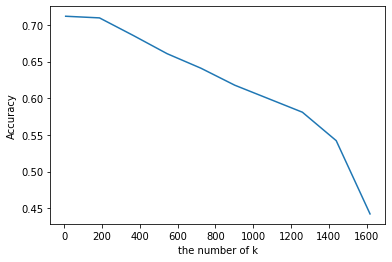

In [ ]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k : " + str(k) )

The best number of k : 7


In [ ]:
k_list = []
for i in range(7, 367, 9):
    k_list.append(i)

cross_validation_scores2 = []
x_train = train.iloc[:,3:37]
y_train = train[['Position']]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores2.append(scores.mean())

cross_validation_scores2

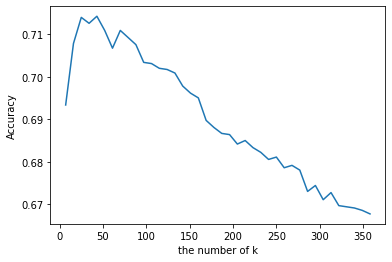

In [ ]:
plt.plot(k_list, cross_validation_scores2)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
cvs2 = cross_validation_scores2
k = k_list[cvs2.index(max(cross_validation_scores2))]
print("The best number of k : " + str(k) )

The best number of k : 43


In [ ]:
k_list = []
for i in range(52, 70):
    k_list.append(i)

cross_validation_scores3 = []
x_train = train.iloc[:,3:37]
y_train = train[['Position']]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10, scoring='accuracy')
    cross_validation_scores3.append(scores.mean())

cross_validation_scores3

[0.7109444297474363,
 0.7148472635035247,
 0.7134560619971678,
 0.7106619878308772,
 0.7123379654845086,
 0.7103865486064642,
 0.7101064409206207,
 0.7092668959399947,
 0.7078772505874481,
 0.7067583759978837,
 0.7092692301707102,
 0.7095485597796486,
 0.7084320194207996,
 0.7089899005617715,
 0.7103834362988437,
 0.7089906786386766,
 0.7101072189975257,
 0.7106635439846875]

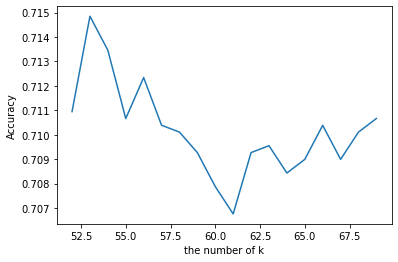

In [ ]:
plt.plot(k_list, cross_validation_scores3)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
cvs3 = cross_validation_scores3
k = k_list[cvs3.index(max(cross_validation_scores3))]
print("The best number of k : " + str(k) )

The best number of k : 53


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)


x_train = train.iloc[:,3:37]

y_train = train[['Position']]


knn.fit(x_train, y_train.values.ravel())


x_test = test.iloc[:,3:37]


y_test = test[['Position']]


pred = knn.predict(x_test)

In [ ]:
comparison = pd.DataFrame(
    {'prediction':pred, 'ground_truth':y_test.values.ravel()})
comparison

,prediction,ground_truth
0,CM,CM
1,CAM,CAM
2,CB,CB
3,CM,CDM
4,CM,CDM
...,...,...
3579,ST,CAM
3580,CB,CB
3581,WM,WM
3582,ST,WM


In [ ]:
print("accuracy : "+
          str(accuracy_score(y_test.values.ravel(), pred)) )

accuracy : 0.7271205357142857
